**Dataset Description**
The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.

**File descriptions**
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
images - the image files (each image is named with its corresponding id)

**Data fields**
id - an anonymous id unique to an image
margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from glob import glob
import cv2
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras


In [ ]:
#read the data
df=pd.read_csv("train.csv")
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
#data description
df.drop(columns=['id']).describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


# **Clean Data**

In [ ]:
 #checking nulls
 df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df.isna().sum().sum()

0

In [ ]:
#checking duplicates
df. duplicated().sum()

0

The dataset is clean, without any missing values or duplicate entries.

In [ ]:
df['margin8'].unique()

array([0.      , 0.007812, 0.001953, 0.005859, 0.03125 , 0.013672,
       0.003906, 0.015625, 0.017578])

In [ ]:
df.select_dtypes(include='int')

,id
0,1
1,2
2,3
3,5
4,6
...,...
985,1575
986,1578
987,1581
988,1582


# number of classes

In [ ]:
#Counts the number of unique classes
df['species'].nunique()

99

In [ ]:
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [ ]:
# drop id columns
df.drop(columns='id',inplace=True)

# Visualization of the data

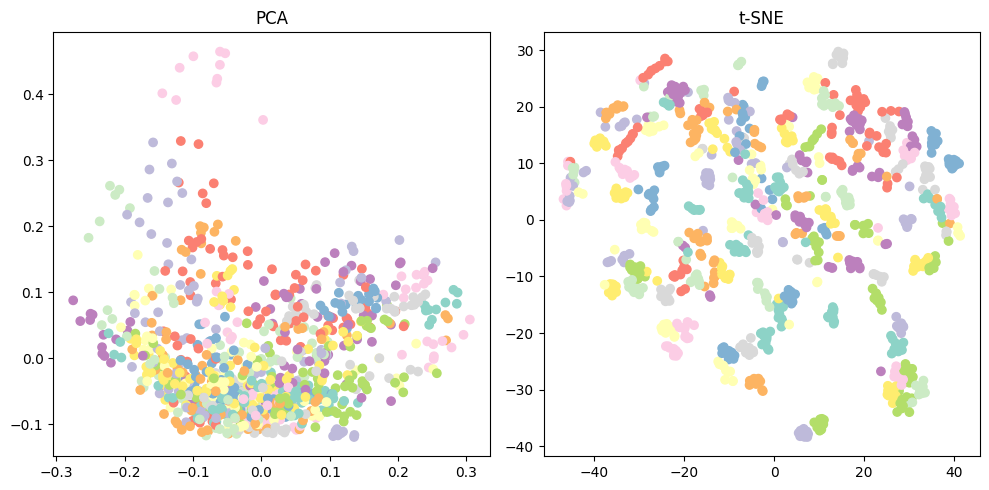

In [ ]:
X = df.drop(columns=['species'])
y = df['species']
y_numeric = pd.factorize(y)[0]
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
# Visualizing PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='Set3')
plt.title('PCA')
# Visualizing t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_numeric, cmap='Set3')
plt.title('t-SNE')
plt.tight_layout()
plt.show()


In [ ]:
pip install opencv-python

In [ ]:
!unzip -q /content/images.zip

# drawing some images

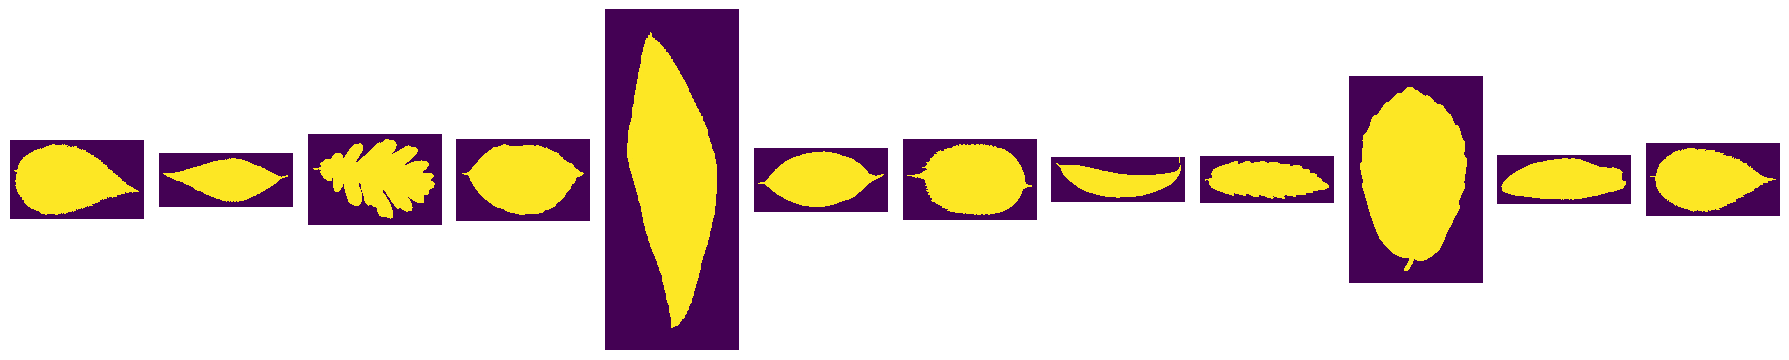

In [ ]:

images = []
files = glob('images/*.jpg')
random.shuffle(files)
for file in files:
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        images.append(image)
num_images = min(len(images), 12)
fig, axes = plt.subplots(1, num_images, figsize=(18, 4))
for j, ax in enumerate(axes):
    if j < len(images):
        ax.imshow(images[j], cmap='viridis', interpolation='nearest')
        ax.axis('off')

plt.tight_layout()
plt.show()


#  Carry out required correlation analysis

In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


<Axes: >

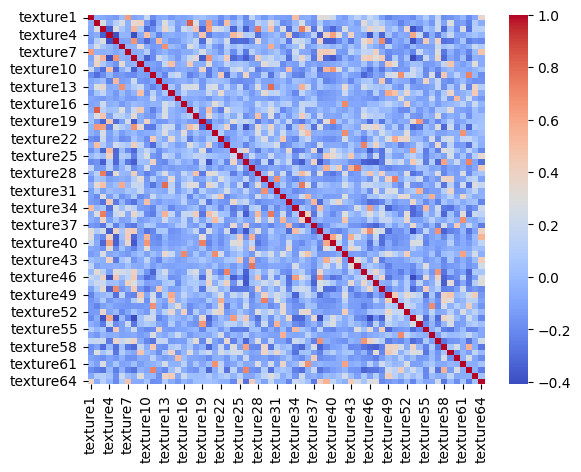

In [ ]:
texture_features = df.filter(like='texture')
sns.heatmap(texture_features.corr(), annot=False, cmap='coolwarm')

<Axes: >

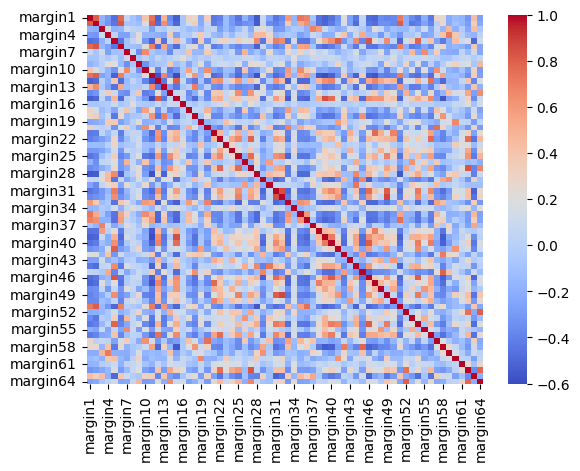

In [ ]:
texture_features = df.filter(like='margin')
sns.heatmap(texture_features.corr(), annot=False, cmap='coolwarm')

<Axes: >

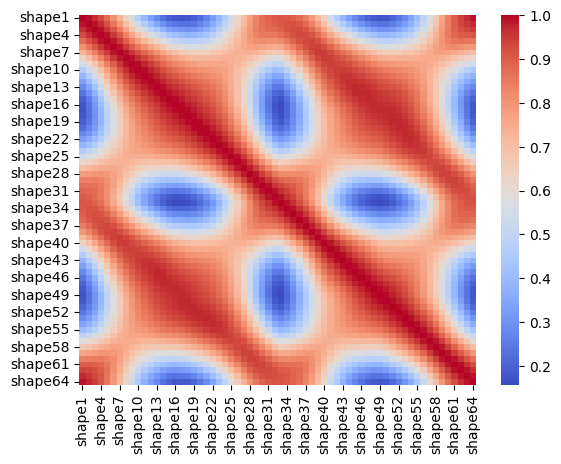

In [ ]:
texture_features = df.filter(like='shape')
sns.heatmap(texture_features.corr(), annot=False, cmap='coolwarm')

<ipython-input-18-085e44baf3fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


<Axes: >

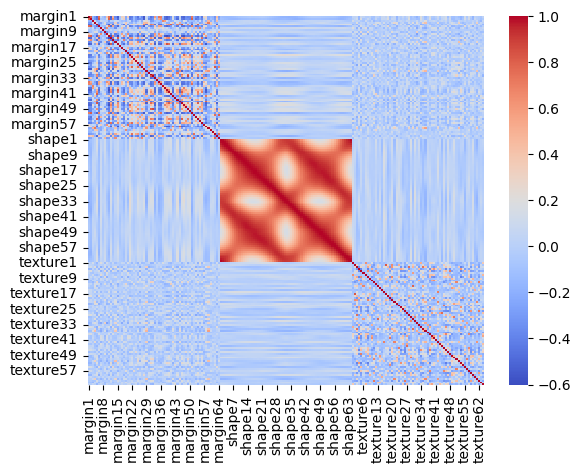

In [ ]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


Features positioned centrally on the correlation diagram show strong correlations with each other


I will drop features that have a correlation greater than 80% with each other.

In [ ]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
upper_triangle = corr_matrix.mask(mask)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
to_drop

<ipython-input-19-06ae6d19f6b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


['margin1',
 'margin2',
 'margin5',
 'margin12',
 'margin15',
 'margin27',
 'margin31',
 'margin32',
 'margin40',
 'margin46',
 'margin52',
 'shape1',
 'shape2',
 'shape3',
 'shape4',
 'shape5',
 'shape6',
 'shape7',
 'shape8',
 'shape9',
 'shape10',
 'shape11',
 'shape12',
 'shape13',
 'shape14',
 'shape15',
 'shape16',
 'shape17',
 'shape18',
 'shape19',
 'shape20',
 'shape21',
 'shape22',
 'shape23',
 'shape24',
 'shape25',
 'shape26',
 'shape27',
 'shape28',
 'shape29',
 'shape30',
 'shape31',
 'shape32',
 'shape33',
 'shape34',
 'shape35',
 'shape36',
 'shape37',
 'shape38',
 'shape39',
 'shape40',
 'shape41',
 'shape42',
 'shape43',
 'shape44',
 'shape45',
 'shape46',
 'shape47',
 'shape48',
 'shape49',
 'shape50',
 'shape51',
 'shape52',
 'shape53',
 'shape54',
 'shape55',
 'shape56',
 'shape57',
 'shape58',
 'shape59',
 'shape60',
 'shape61',
 'shape62',
 'shape63',
 'texture2']

In [ ]:
# Removing columns listed in 'to_drop' from the dataset
df.drop(to_drop, axis=1, inplace=True)


NameError: name 'df_test' is not defined

In [ ]:
df

# divide data

In [ ]:
x=df.drop(['species'],axis=1).values
y=df['species'].values
# x_test=df_test.drop('id',axis=1).values

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_encoded = label_encoder.transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_train_encoded,test_size=0.2,stratify=y_train_encoded,random_state=42)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,random_state=42)

In [ ]:
x

array([[0.023438, 0.003906, 0.009766, ..., 0.004883, 0.      , 0.025391],
       [0.03125 , 0.015625, 0.001953, ..., 0.000977, 0.039062, 0.022461],
       [0.019531, 0.007812, 0.005859, ..., 0.      , 0.020508, 0.00293 ],
       ...,
       [0.      , 0.021484, 0.003906, ..., 0.027344, 0.      , 0.001953],
       [0.046875, 0.056641, 0.      , ..., 0.      , 0.001953, 0.00293 ],
       [0.03125 , 0.015625, 0.019531, ..., 0.023438, 0.025391, 0.022461]])

In [ ]:
x_train.mean(axis=0)

array([0.03150303, 0.02409158, 0.03784071, 0.01908073, 0.00104284,
       0.00724154, 0.01875368, 0.02440014, 0.04181481, 0.00813331,
       0.0001265 , 0.0149184 , 0.02030877, 0.01229567, 0.01328305,
       0.01889249, 0.00622341, 0.00105215, 0.00760571, 0.00872575,
       0.01883393, 0.01554164, 0.02789603, 0.01664316, 0.01936767,
       0.00108603, 0.01320282, 0.01768917, 0.01589034, 0.03076864,
       0.01515288, 0.01126512, 0.01754105, 0.01811496, 0.01284797,
       0.02514991, 0.02492157, 0.02706296, 0.00879056, 0.01387239,
       0.02588118, 0.02415949, 0.01042588, 0.01836489, 0.00599507,
       0.01234503, 0.02013288, 0.0306205 , 0.01204266, 0.00135754,
       0.00495218, 0.0251746 , 0.00442143, 0.0007375 , 0.021469  ,
       0.01021767, 0.01561424, 0.02635341, 0.00999241, 0.01695951,
       0.01965312, 0.01518223, 0.02028573, 0.01811348, 0.0259645 ,
       0.00996311, 0.01235899, 0.01196716, 0.00491677, 0.01503112,
       0.0058918 , 0.02441717, 0.01436764, 0.00255788, 0.01294

In [ ]:
x_train.std(axis=0)

array([0.02533303, 0.02994192, 0.05144778, 0.0177578 , 0.00264561,
       0.0088556 , 0.01640578, 0.02624788, 0.0488134 , 0.01377244,
       0.00119343, 0.01089099, 0.0224053 , 0.01454936, 0.0098578 ,
       0.01955524, 0.01029819, 0.00448193, 0.01267671, 0.01244251,
       0.01211858, 0.01427418, 0.02235342, 0.01604446, 0.01592012,
       0.00203352, 0.01334682, 0.01611865, 0.01105359, 0.02311077,
       0.01351565, 0.02370199, 0.01432263, 0.02049376, 0.01182793,
       0.02483891, 0.02129658, 0.03086398, 0.01651496, 0.0175873 ,
       0.02558268, 0.01862367, 0.01629229, 0.0225483 , 0.00900138,
       0.00993967, 0.01937346, 0.03145966, 0.01283965, 0.00226603,
       0.01015124, 0.02032958, 0.00911645, 0.00027723, 0.04353225,
       0.01256194, 0.02176323, 0.03695009, 0.02082634, 0.02169971,
       0.02479585, 0.0236317 , 0.03900348, 0.03186653, 0.07008922,
       0.01432045, 0.01631789, 0.0675419 , 0.01251848, 0.02650281,
       0.01322777, 0.03197578, 0.01634532, 0.00954396, 0.02187

In [ ]:
scaled_x_train=(x_train-x_train.mean(axis=0))/(x_train.std(axis=0))
scaled_x_test=(x_test-x_train.mean(axis=0))/x_train.std(axis=0)
scaled_x_val=(x_val-x_train.mean(axis=0))/x_train.std(axis=0)
print (scaled_x_train)

[[ 0.22129078 -0.67415776 -0.43181097 ... -0.36849703 -0.65632609
   0.64875189]
 [-0.70386515 -0.47844554  4.31368089 ... -0.41732193 -0.65632609
  -0.25634781]
 [-1.01227677 -0.54370521 -0.73551701 ...  0.55925107  0.38193357
  -0.29946671]
 ...
 [ 1.06939314 -0.08708787 -0.62163454 ... -0.51497174  1.00497442
   0.21773943]
 [-1.24355588  0.04339808 -0.73551701 ...  0.36392647 -0.65632609
  -0.60116661]
 [-0.00998833  0.56524169  0.06171862 ... -0.36849703  2.25091437
  -0.38566037]]


In [ ]:
scaled_x_train

array([[ 0.22129078, -0.67415776, -0.43181097, ..., -0.36849703,
        -0.65632609,  0.64875189],
       [-0.70386515, -0.47844554,  4.31368089, ..., -0.41732193,
        -0.65632609, -0.25634781],
       [-1.01227677, -0.54370521, -0.73551701, ...,  0.55925107,
         0.38193357, -0.29946671],
       ...,
       [ 1.06939314, -0.08708787, -0.62163454, ..., -0.51497174,
         1.00497442,  0.21773943],
       [-1.24355588,  0.04339808, -0.73551701, ...,  0.36392647,
        -0.65632609, -0.60116661],
       [-0.00998833,  0.56524169,  0.06171862, ..., -0.36849703,
         2.25091437, -0.38566037]])

In [ ]:
def train_model(x_train, y_train, x_val, y_val, kwargs):

    numnodes=kwargs['number_of_nodes']
    reg=kwargs['reg']
    batch_size=kwargs['batch_size']
    epochs_=kwargs['epochs']
    optimizer_=kwargs['optimizer']
    lr=kwargs['LR']
    try:
      drop=kwargs['dropOut']
    except:
        drop=None

    if optimizer_=='SGD':
      optimizer_=keras.optimizers.SGD(
      learning_rate=lr)
    elif optimizer_=='adam':
      optimizer_=keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_=='RMSprop':
      optimizer_==keras.optimizers.RMSprop(learning_rate=lr)

    if drop==None:

      model = Sequential()
      model.add(Dense(numnodes, activation='tanh', input_shape=(117,), kernel_regularizer=l2(reg), bias_regularizer=l2(reg)))
      model.add(Dense(99, activation='softmax'))
      model.compile(optimizer=optimizer_, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
      result = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2)
      return model, result
    else:
      model = Sequential()
      model.add(Dense(numnodes, activation='tanh', input_shape=(117,), kernel_regularizer=l2(reg), bias_regularizer=l2(reg)))
      model.add(Dropout(drop))
      model.add(Dense(99, activation='softmax'))
      model.compile(optimizer=optimizer_, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
      result = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2)
      return model, result




In [ ]:
def evaluation(x_train, x_test, y_train, y_test, trained_model):
    train_loss, train_accuracy = trained_model.evaluate(x_train, y_train)
    test_loss, test_accuracy = trained_model.evaluate(x_test, y_test)
    print('Training Accuracy:', train_accuracy)
    print('Testing Accuracy:', test_accuracy)
    return train_accuracy, test_accuracy


In [ ]:
x_train.shape

(633, 117)

## Tuning the Batch size:
in this experiment i will try to compare the effect of changing the batch size by making the hyperparameters constant with this set of values hyperparamters=
    {'number_of_nodes':128,
    'reg':0,
    'epochs':100,
    'optimizer':'adam',
    'LR':0.1} <br>

and observe the effect of choosing different Batch size:
  - i will start with Batch size =1 which means that i will Try SGD.
  - then i will try Batch size = 633 which means True BGD.
  - followed by different Batch Sizes as [16,32,64].



In [ ]:
# Stochastic Gradient Descent
hyperparameters={
    'number_of_nodes':512,
    'reg':0,
    'epochs':100,
    'optimizer':'adam',
    'LR':0.01,
}
hyperparameters['batch_size']=1
model1,result=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/100
633/633 - 2s - loss: 3.5461 - accuracy: 0.2212 - val_loss: 1.8924 - val_accuracy: 0.5031 - 2s/epoch - 4ms/step
Epoch 2/100
633/633 - 2s - loss: 1.3428 - accuracy: 0.6082 - val_loss: 2.0180 - val_accuracy: 0.5409 - 2s/epoch - 3ms/step
Epoch 3/100
633/633 - 2s - loss: 1.2782 - accuracy: 0.6935 - val_loss: 1.4074 - val_accuracy: 0.6730 - 2s/epoch - 3ms/step
Epoch 4/100
633/633 - 2s - loss: 0.9633 - accuracy: 0.8009 - val_loss: 1.2257 - val_accuracy: 0.7358 - 2s/epoch - 3ms/step
Epoch 5/100
633/633 - 1s - loss: 0.7489 - accuracy: 0.8341 - val_loss: 1.1075 - val_accuracy: 0.8050 - 1s/epoch - 2ms/step
Epoch 6/100
633/633 - 2s - loss: 0.6688 - accuracy: 0.8926 - val_loss: 1.0202 - val_accuracy: 0.8050 - 2s/epoch - 2ms/step
Epoch 7/100
633/633 - 1s - loss: 0.9483 - accuracy: 0.8626 - val_loss: 1.5207 - val_accuracy: 0.7547 - 1s/epoch - 2ms/step
Epoch 8/100
633/633 - 2s - loss: 1.0754 - accuracy: 0.8262 - val_loss: 1.5955 - val_accuracy: 0.8113 - 2s/epoch - 2ms/step
Epoch 9/100
633/

In [ ]:
evaluation(x_train,x_val,y_train,y_val,model1)

5/5 [==============================] - 0s 4ms/step - loss: 1.8520 - accuracy: 0.9057
Training Accuracy: 1.0
Testing Accuracy: 0.9056603908538818


(1.0, 0.9056603908538818)

In [ ]:
# True Batch Gradient Descent
hyperparameters['batch_size']=633
model2,result2=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/100
1/1 - 1s - loss: 4.5954 - accuracy: 0.0095 - val_loss: 4.5186 - val_accuracy: 0.1572 - 964ms/epoch - 964ms/step
Epoch 2/100
1/1 - 0s - loss: 4.4907 - accuracy: 0.3128 - val_loss: 4.4327 - val_accuracy: 0.2013 - 41ms/epoch - 41ms/step
Epoch 3/100
1/1 - 0s - loss: 4.3790 - accuracy: 0.3997 - val_loss: 4.3255 - val_accuracy: 0.2264 - 32ms/epoch - 32ms/step
Epoch 4/100
1/1 - 0s - loss: 4.2486 - accuracy: 0.4344 - val_loss: 4.1883 - val_accuracy: 0.2830 - 32ms/epoch - 32ms/step
Epoch 5/100
1/1 - 0s - loss: 4.0928 - accuracy: 0.4739 - val_loss: 4.0197 - val_accuracy: 0.3208 - 31ms/epoch - 31ms/step
Epoch 6/100
1/1 - 0s - loss: 3.9091 - accuracy: 0.5371 - val_loss: 3.8235 - val_accuracy: 0.3899 - 50ms/epoch - 50ms/step
Epoch 7/100
1/1 - 0s - loss: 3.6992 - accuracy: 0.6145 - val_loss: 3.6064 - val_accuracy: 0.5220 - 50ms/epoch - 50ms/step
Epoch 8/100
1/1 - 0s - loss: 3.4672 - accuracy: 0.7030 - val_loss: 3.3752 - val_accuracy: 0.6038 - 50ms/epoch - 50ms/step
Epoch 9/100
1/1 - 0s -

In [ ]:
evaluation(x_train,x_val,y_train,y_val,model2)

5/5 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9371
Training Accuracy: 1.0
Testing Accuracy: 0.9371069073677063


(1.0, 0.9371069073677063)

In [ ]:
# mini batch gradient Descent with batch size =16
hyperparameters['batch_size']=16
model3,result3=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/100
40/40 - 1s - loss: 3.9994 - accuracy: 0.1596 - val_loss: 2.9074 - val_accuracy: 0.3145 - 1s/epoch - 25ms/step
Epoch 2/100
40/40 - 0s - loss: 1.8821 - accuracy: 0.5261 - val_loss: 1.3067 - val_accuracy: 0.7170 - 134ms/epoch - 3ms/step
Epoch 3/100
40/40 - 0s - loss: 0.8059 - accuracy: 0.8199 - val_loss: 0.7369 - val_accuracy: 0.8113 - 140ms/epoch - 3ms/step
Epoch 4/100
40/40 - 0s - loss: 0.3910 - accuracy: 0.9273 - val_loss: 0.4661 - val_accuracy: 0.8742 - 140ms/epoch - 3ms/step
Epoch 5/100
40/40 - 0s - loss: 0.2325 - accuracy: 0.9573 - val_loss: 0.4067 - val_accuracy: 0.8931 - 149ms/epoch - 4ms/step
Epoch 6/100
40/40 - 0s - loss: 0.1508 - accuracy: 0.9810 - val_loss: 0.3073 - val_accuracy: 0.9308 - 136ms/epoch - 3ms/step
Epoch 7/100
40/40 - 0s - loss: 0.0872 - accuracy: 0.9889 - val_loss: 0.2910 - val_accuracy: 0.9245 - 143ms/epoch - 4ms/step
Epoch 8/100
40/40 - 0s - loss: 0.0595 - accuracy: 0.9937 - val_loss: 0.2522 - val_accuracy: 0.9371 - 140ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
evaluation(x_train,x_val,y_train,y_val,model3)

5/5 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.9434
Training Accuracy: 1.0
Testing Accuracy: 0.9433962106704712


(1.0, 0.9433962106704712)

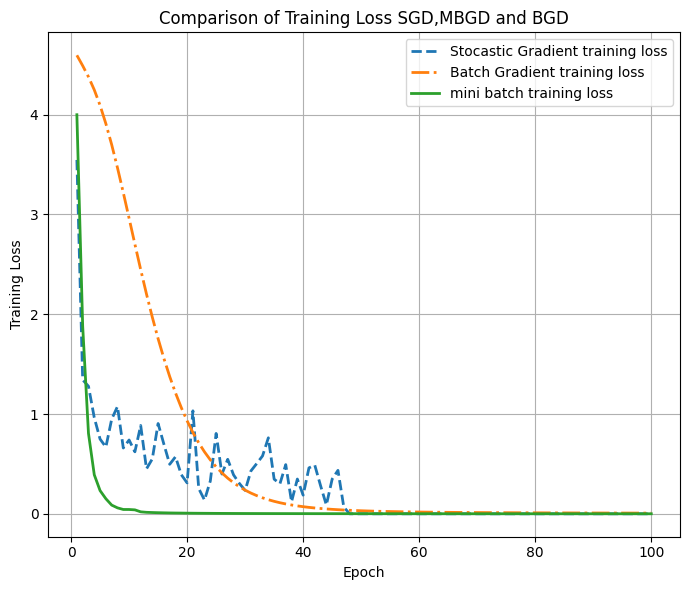

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(result.history['loss']) + 1), result.history['loss'], label='Stocastic Gradient training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(result2.history['loss']) + 1), result2.history['loss'], label='Batch Gradient training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(result3.history['loss']) + 1), result3.history['loss'], label='mini batch training loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss SGD,MBGD and BGD')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


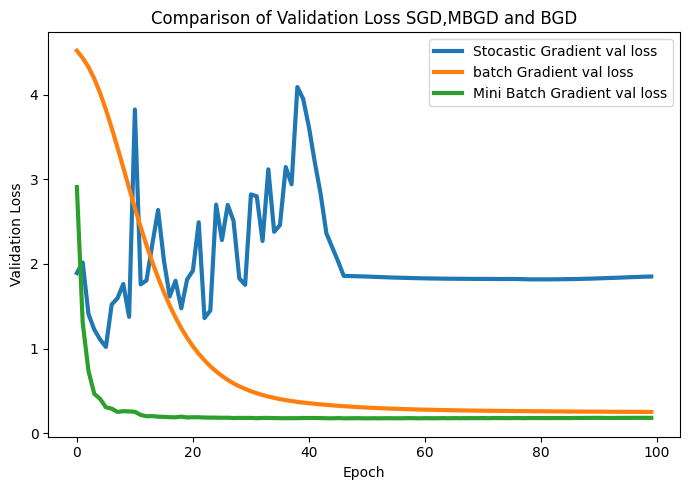

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
min_length = min(len(result.history['val_loss']), len(result2.history['val_loss']), len(result3.history['val_loss']))
ax.plot(np.arange(min_length), result.history['val_loss'][:min_length],label='Stocastic Gradient val loss',  linewidth=3)
ax.plot(np.arange(min_length), result2.history['val_loss'][:min_length],label='batch Gradient val loss',  linewidth=3)
ax.plot(np.arange(min_length), result3.history['val_loss'][:min_length], label='Mini Batch Gradient val loss',linewidth=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Comparison of Validation Loss SGD,MBGD and BGD')
ax.legend()
plt.tight_layout()
plt.show()

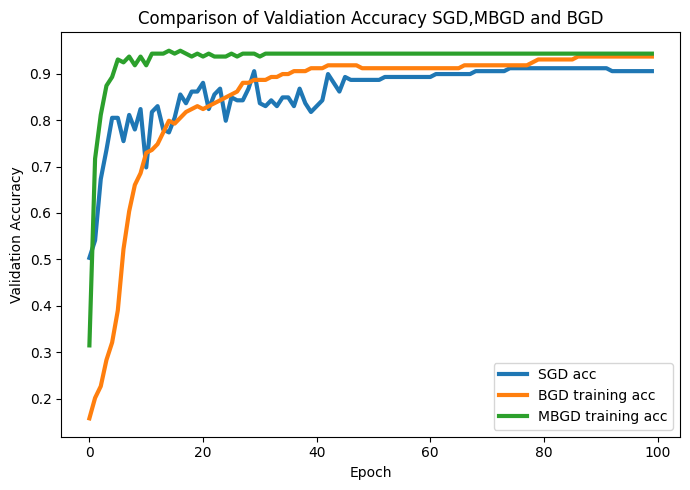

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
num_epochs=100
ax.plot(np.arange(min_length), result.history['val_accuracy'],label='SGD acc',lw=3)
ax.plot(np.arange(min_length), result2.history['val_accuracy'],label='BGD training acc',lw=3)
ax.plot(np.arange(min_length), result3.history['val_accuracy'],label='MBGD training acc',lw=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Valdiation Accuracy SGD,MBGD and BGD')
ax.legend()
plt.tight_layout()
plt.show()

- as we can see here from the Graphs The mini batch Gradient Descent is the most suitable for our problem i will try to tune this in the next experiment after trying different optimizers, although through the training i also observed the training time for each model and as expected the SGD takes the most times this is becuase of the number of using the update rule in the back propagation, compared to the BGD model which takes the least time in the computation as it only update 100 times through the training which is the number of epochs, while the Mini batch gradient descent model was between them in the time comparsion.<br>
for the convergance as expected the SGD model contain oscillations in the loss curve, while the BGD model takes more epochs to converge but the curve was more smoother and of course the MBGD was in between both of them.

# comparing different optimizers:
in this Experiment i will try to compare different optimizers as SGD, momentum and Adam with the following hyperparameters:hyperparameters={
    'number_of_nodes':512,
    'reg':0,
    'epochs':250,
    'batch_size':32,
    'LR':0.1,
}

In [ ]:
# Stochastic Gradient Descent optimizer
hyperparameters={
    'number_of_nodes':512,
    'reg':0,
    'epochs':250,
    'batch_size':32,
    'LR':0.1,
}
hyperparameters['optimizer']='SGD'
model1,result1=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/250
20/20 - 1s - loss: 4.5962 - accuracy: 0.0095 - val_loss: 4.5915 - val_accuracy: 0.0189 - 771ms/epoch - 39ms/step
Epoch 2/250
20/20 - 0s - loss: 4.5916 - accuracy: 0.0221 - val_loss: 4.5894 - val_accuracy: 0.0252 - 101ms/epoch - 5ms/step
Epoch 3/250
20/20 - 0s - loss: 4.5875 - accuracy: 0.0205 - val_loss: 4.5872 - val_accuracy: 0.0189 - 124ms/epoch - 6ms/step
Epoch 4/250
20/20 - 0s - loss: 4.5832 - accuracy: 0.0316 - val_loss: 4.5849 - val_accuracy: 0.0189 - 96ms/epoch - 5ms/step
Epoch 5/250
20/20 - 0s - loss: 4.5791 - accuracy: 0.0506 - val_loss: 4.5826 - val_accuracy: 0.0377 - 91ms/epoch - 5ms/step
Epoch 6/250
20/20 - 0s - loss: 4.5749 - accuracy: 0.0648 - val_loss: 4.5802 - val_accuracy: 0.0440 - 90ms/epoch - 5ms/step
Epoch 7/250
20/20 - 0s - loss: 4.5706 - accuracy: 0.0679 - val_loss: 4.5777 - val_accuracy: 0.0377 - 88ms/epoch - 4ms/step
Epoch 8/250
20/20 - 0s - loss: 4.5661 - accuracy: 0.0806 - val_loss: 4.5753 - val_accuracy: 0.0503 - 105ms/epoch - 5ms/step
Epoch 9/250

In [ ]:
evaluation(x_train,x_val,y_train,y_val,model1)

5/5 [==============================] - 0s 4ms/step - loss: 1.9640 - accuracy: 0.7107
Training Accuracy: 0.8467614650726318
Testing Accuracy: 0.7106918096542358


(0.8467614650726318, 0.7106918096542358)

In [ ]:
# Rmsprop optimizer
hyperparameters={
    'number_of_nodes':512,
    'reg':0,
    'epochs':250,
    'batch_size':32,
    'LR':0.1,
}
hyperparameters['optimizer']='RMSprop'
model2,result2=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/250
20/20 - 1s - loss: 4.5733 - accuracy: 0.0411 - val_loss: 4.5315 - val_accuracy: 0.1887 - 856ms/epoch - 43ms/step
Epoch 2/250
20/20 - 0s - loss: 4.4953 - accuracy: 0.2607 - val_loss: 4.4659 - val_accuracy: 0.3208 - 131ms/epoch - 7ms/step
Epoch 3/250
20/20 - 0s - loss: 4.4121 - accuracy: 0.3965 - val_loss: 4.3852 - val_accuracy: 0.3459 - 126ms/epoch - 6ms/step
Epoch 4/250
20/20 - 0s - loss: 4.3093 - accuracy: 0.4518 - val_loss: 4.2845 - val_accuracy: 0.3836 - 127ms/epoch - 6ms/step
Epoch 5/250
20/20 - 0s - loss: 4.1817 - accuracy: 0.5024 - val_loss: 4.1592 - val_accuracy: 0.4025 - 129ms/epoch - 6ms/step
Epoch 6/250
20/20 - 0s - loss: 4.0323 - accuracy: 0.5150 - val_loss: 4.0154 - val_accuracy: 0.4151 - 114ms/epoch - 6ms/step
Epoch 7/250
20/20 - 0s - loss: 3.8619 - accuracy: 0.5276 - val_loss: 3.8550 - val_accuracy: 0.4340 - 123ms/epoch - 6ms/step
Epoch 8/250
20/20 - 0s - loss: 3.6782 - accuracy: 0.5308 - val_loss: 3.6853 - val_accuracy: 0.4465 - 129ms/epoch - 6ms/step
Epoch 9

In [ ]:
evaluation(x_train,x_val,y_train,y_val,model2)

5/5 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9245
Training Accuracy: 1.0
Testing Accuracy: 0.9245283007621765


(1.0, 0.9245283007621765)

In [ ]:
# Adam optimizer
hyperparameters={
    'number_of_nodes':512,
    'reg':0,
    'epochs':250,
    'batch_size':32,
    'LR':0.1,
}
hyperparameters['optimizer']='Adam'
model3,result3=train_model(x_train,y_train,x_val,y_val, hyperparameters)

Epoch 1/250
20/20 - 1s - loss: 4.5709 - accuracy: 0.0742 - val_loss: 4.5201 - val_accuracy: 0.2201 - 992ms/epoch - 50ms/step
Epoch 2/250
20/20 - 0s - loss: 4.4637 - accuracy: 0.3981 - val_loss: 4.4252 - val_accuracy: 0.4025 - 105ms/epoch - 5ms/step
Epoch 3/250
20/20 - 0s - loss: 4.3396 - accuracy: 0.5766 - val_loss: 4.2981 - val_accuracy: 0.4717 - 102ms/epoch - 5ms/step
Epoch 4/250
20/20 - 0s - loss: 4.1721 - accuracy: 0.5908 - val_loss: 4.1182 - val_accuracy: 0.5031 - 85ms/epoch - 4ms/step
Epoch 5/250
20/20 - 0s - loss: 3.9447 - accuracy: 0.6367 - val_loss: 3.8835 - val_accuracy: 0.5346 - 93ms/epoch - 5ms/step
Epoch 6/250
20/20 - 0s - loss: 3.6639 - accuracy: 0.6477 - val_loss: 3.6089 - val_accuracy: 0.4969 - 97ms/epoch - 5ms/step
Epoch 7/250
20/20 - 0s - loss: 3.3521 - accuracy: 0.6588 - val_loss: 3.3139 - val_accuracy: 0.5346 - 94ms/epoch - 5ms/step
Epoch 8/250
20/20 - 0s - loss: 3.0314 - accuracy: 0.6825 - val_loss: 3.0292 - val_accuracy: 0.5535 - 88ms/epoch - 4ms/step
Epoch 9/250


In [ ]:
evaluation(x_train,x_val,y_train,y_val,model3)

5/5 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9308
Training Accuracy: 1.0
Testing Accuracy: 0.9308176040649414


(1.0, 0.9308176040649414)

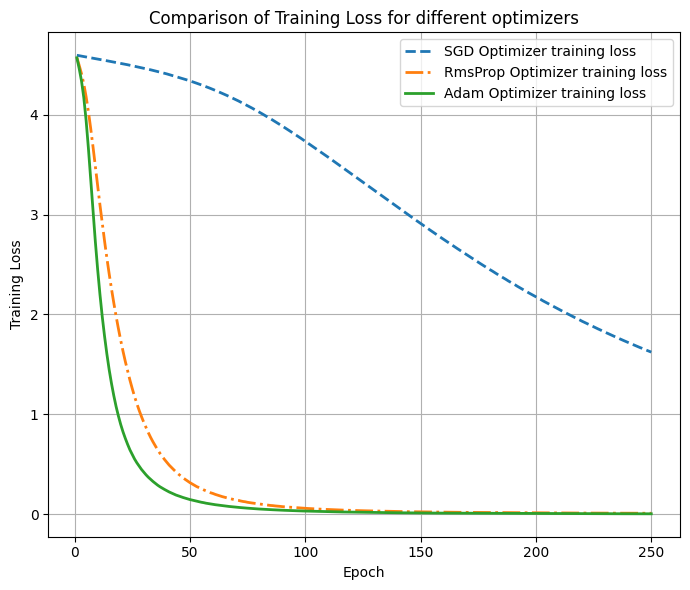

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(result.history['loss']) + 1), result1.history['loss'], label='SGD Optimizer training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(result2.history['loss']) + 1), result2.history['loss'], label='RmsProp Optimizer training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(result3.history['loss']) + 1), result3.history['loss'], label='Adam Optimizer training loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss for different optimizers')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


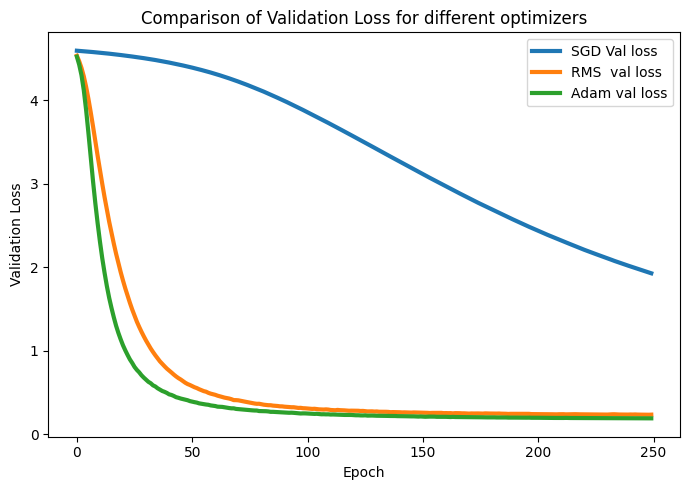

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
min_length = min(len(result.history['val_loss']), len(result2.history['val_loss']), len(result3.history['val_loss']))
ax.plot(np.arange(min_length), result1.history['val_loss'][:min_length],label='SGD Val loss',  linewidth=3)
ax.plot(np.arange(min_length), result2.history['val_loss'][:min_length],label='RMS  val loss',  linewidth=3)
ax.plot(np.arange(min_length), result3.history['val_loss'][:min_length], label='Adam val loss',linewidth=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Comparison of Validation Loss for different optimizers')
ax.legend()
plt.tight_layout()
plt.show()

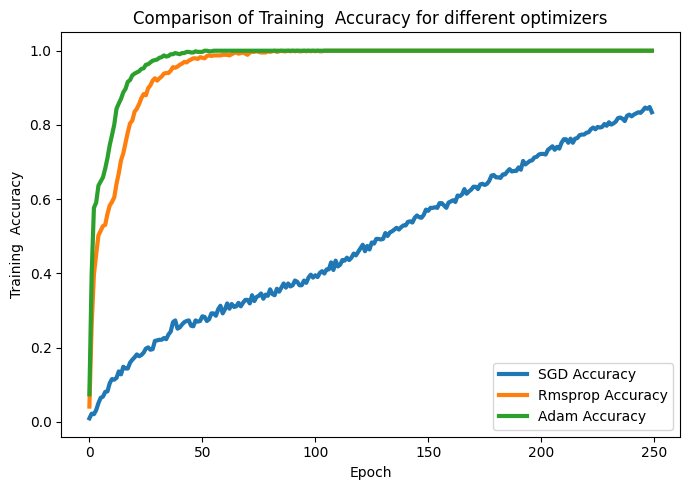

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
min_length=250
ax.plot(np.arange(min_length), result1.history['accuracy'],label='SGD Accuracy',lw=3)
ax.plot(np.arange(min_length), result2.history['accuracy'],label='Rmsprop Accuracy',lw=3)
ax.plot(np.arange(min_length), result3.history['accuracy'],label='Adam Accuracy',lw=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Training  Accuracy')
ax.set_title('Comparison of Training  Accuracy for different optimizers')
ax.legend()
plt.tight_layout()
plt.show()

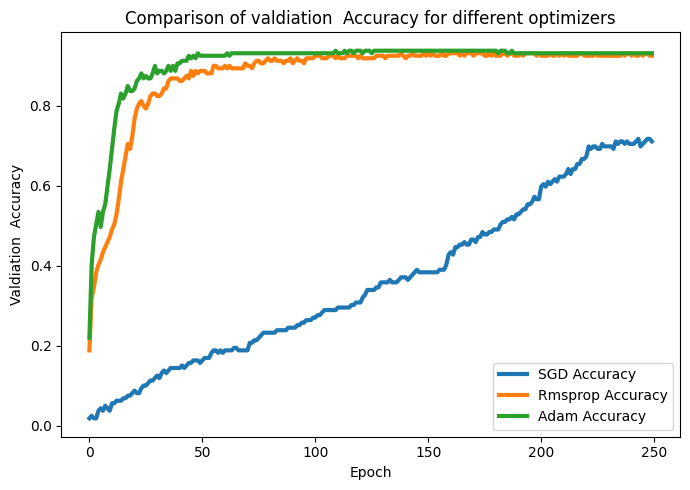

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
min_length=250
ax.plot(np.arange(min_length), result1.history['val_accuracy'],label='SGD Accuracy',lw=3)
ax.plot(np.arange(min_length), result2.history['val_accuracy'],label='Rmsprop Accuracy',lw=3)
ax.plot(np.arange(min_length), result3.history['val_accuracy'],label='Adam Accuracy',lw=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Valdiation  Accuracy')
ax.set_title('Comparison of valdiation  Accuracy for different optimizers')
ax.legend()
plt.tight_layout()
plt.show()

AS we can see from the graphs both the Adam and Rmsporp optimizers could converge faster than SGD optimizer, in the graphs i have observed that the SGD optimizer need more epochs to converge.
but i have decided to continue the project using ADAM optimizers.
## Tuning the Batch size

In [ ]:
batch_sizes = [32, 60, 100]
models = []
results = []

for batch_size in batch_sizes:
    hyperparameters4 = {
        'number_of_nodes': 512,
        'reg': 0,
        'batch_size': batch_size,
        'epochs': 100,
        'optimizer':'Adam',
        'LR': 0.1,
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters4)
    models.append(model)
    results.append(result)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with batch size {batch_sizes[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")


Epoch 1/100
20/20 - 2s - loss: 3.7655 - accuracy: 0.2196 - val_loss: 2.4935 - val_accuracy: 0.5849 - 2s/epoch - 84ms/step
Epoch 2/100
20/20 - 0s - loss: 1.5771 - accuracy: 0.8531 - val_loss: 1.2719 - val_accuracy: 0.8742 - 139ms/epoch - 7ms/step
Epoch 3/100
20/20 - 0s - loss: 0.7063 - accuracy: 0.9652 - val_loss: 0.7821 - val_accuracy: 0.9182 - 151ms/epoch - 8ms/step
Epoch 4/100
20/20 - 0s - loss: 0.3719 - accuracy: 0.9921 - val_loss: 0.5660 - val_accuracy: 0.9245 - 194ms/epoch - 10ms/step
Epoch 5/100
20/20 - 0s - loss: 0.2347 - accuracy: 0.9953 - val_loss: 0.4541 - val_accuracy: 0.9434 - 150ms/epoch - 7ms/step
Epoch 6/100
20/20 - 0s - loss: 0.1638 - accuracy: 0.9968 - val_loss: 0.3869 - val_accuracy: 0.9434 - 149ms/epoch - 7ms/step
Epoch 7/100
20/20 - 0s - loss: 0.1218 - accuracy: 1.0000 - val_loss: 0.3477 - val_accuracy: 0.9434 - 126ms/epoch - 6ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0957 - accuracy: 1.0000 - val_loss: 0.3165 - val_accuracy: 0.9434 - 101ms/epoch - 5ms/step
Epoch 9/1

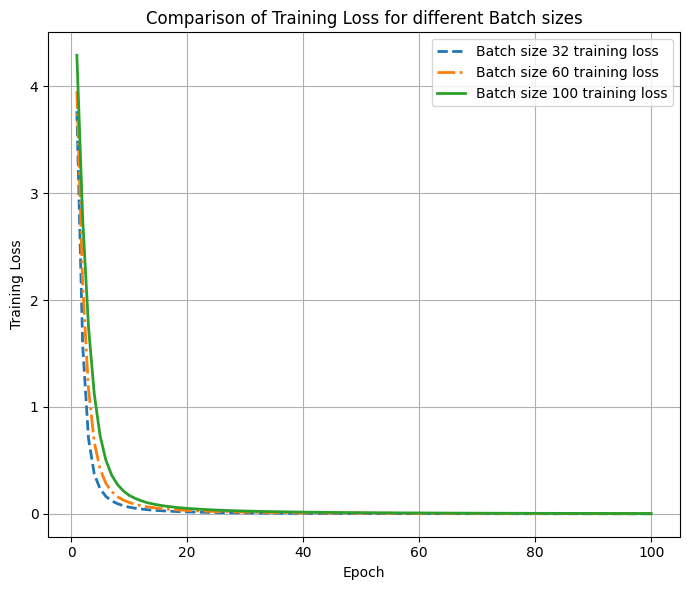

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['loss']) + 1), results[0].history['loss'], label='Batch size 32 training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['loss']) + 1), results[1].history['loss'], label='Batch size 60 training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['loss']) + 1), results[2].history['loss'], label='Batch size 100 training loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss for different Batch sizes')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

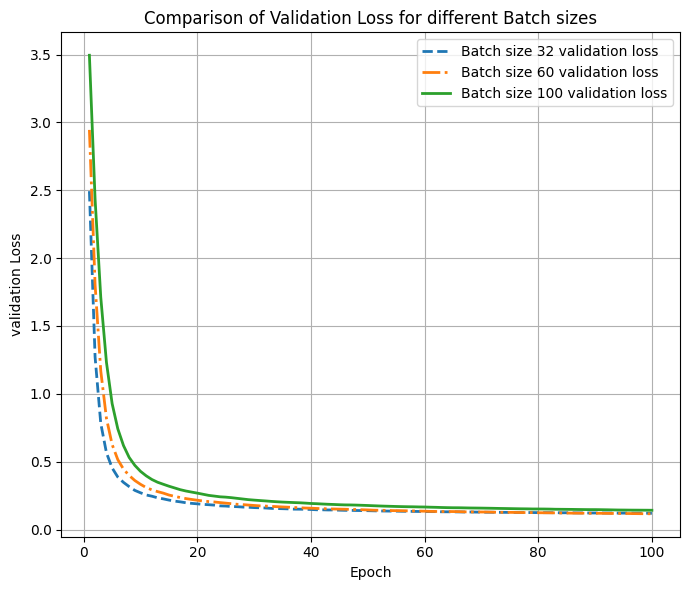

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_loss']) + 1), results[0].history['val_loss'], label='Batch size 32 validation loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_loss']) + 1), results[1].history['val_loss'], label='Batch size 60 validation loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_loss']) + 1), results[2].history['val_loss'], label='Batch size 100 validation loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('validation Loss')
ax.set_title('Comparison of Validation Loss for different Batch sizes')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

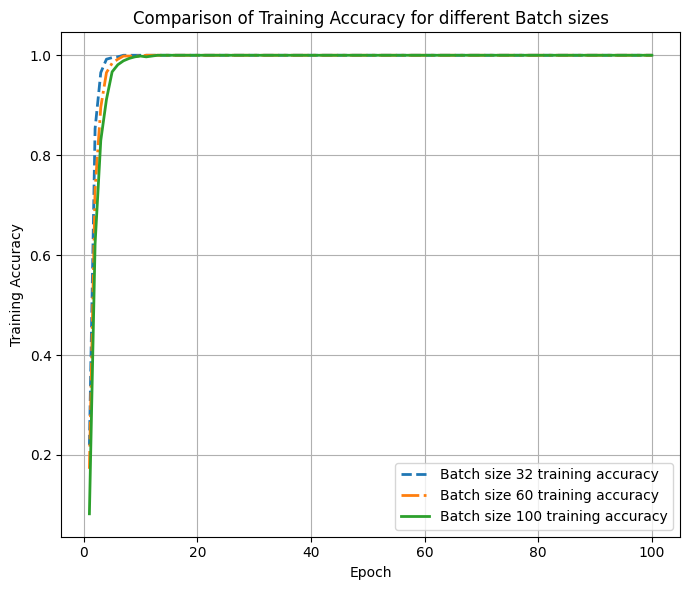

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['accuracy']) + 1), results[0].history['accuracy'], label='Batch size 32 training accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['accuracy']) + 1), results[1].history['accuracy'], label='Batch size 60 training accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['accuracy']) + 1), results[2].history['accuracy'], label='Batch size 100 training accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Accuracy')
ax.set_title('Comparison of Training Accuracy for different Batch sizes')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

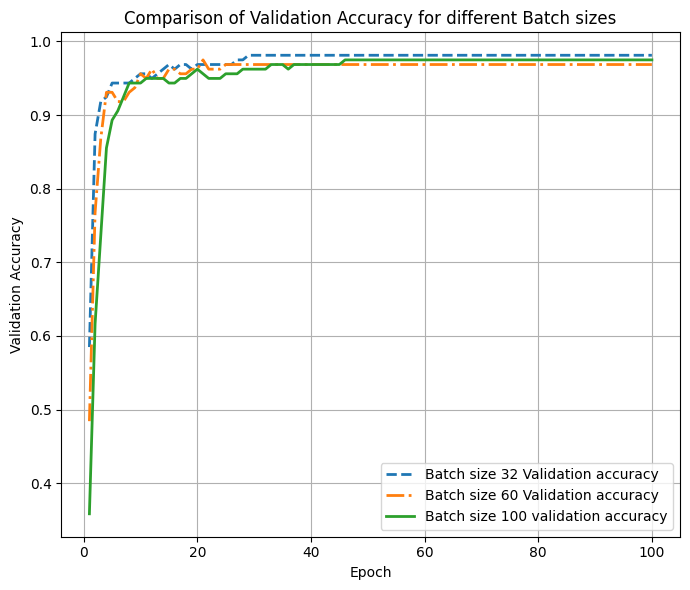

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_accuracy']) + 1), results[0].history['val_accuracy'], label='Batch size 32 Validation accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_accuracy']) + 1), results[1].history['val_accuracy'], label='Batch size 60 Validation accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_accuracy']) + 1), results[2].history['val_accuracy'], label='Batch size 100 validation accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Validation Accuracy for different Batch sizes')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

AS we can see from the graphs as we increase the batch size we are getting closer to the BGD which makes the converagence slower.

# tune the number of nodes:
in this experiment i will try different number of hidden nodes by making the other hyperparameters as below:
    hyperparameters = {

        'reg': 0,
        'batch_size': 32,
        'epochs':100,
        'optimizer':'adam',
        'LR': 0.01,
    }

In [ ]:
number_of_nodes=[32,64,256,512]
models = []
results = []
metrics = []

for nodes in number_of_nodes:
    hyperparameters = {
        'number_of_nodes': nodes,
        'reg': 0,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters)
    models.append(model)
    results.append(result)
    history = result.history
    metric = {

        'accuracy': history['accuracy'],
        'val_loss': history['val_loss'],
        'val_accuracy': history['val_accuracy']
    }
    metrics.append(metric)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with number of nodes in hidden layer {number_of_nodes[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")


Epoch 1/100
20/20 - 1s - loss: 3.8987 - accuracy: 0.1975 - val_loss: 2.9718 - val_accuracy: 0.4591 - 1s/epoch - 53ms/step
Epoch 2/100
20/20 - 0s - loss: 2.2406 - accuracy: 0.7251 - val_loss: 1.8574 - val_accuracy: 0.7736 - 94ms/epoch - 5ms/step
Epoch 3/100
20/20 - 0s - loss: 1.2353 - accuracy: 0.9147 - val_loss: 1.1756 - val_accuracy: 0.8679 - 96ms/epoch - 5ms/step
Epoch 4/100
20/20 - 0s - loss: 0.6911 - accuracy: 0.9637 - val_loss: 0.8260 - val_accuracy: 0.8616 - 85ms/epoch - 4ms/step
Epoch 5/100
20/20 - 0s - loss: 0.4076 - accuracy: 0.9889 - val_loss: 0.6386 - val_accuracy: 0.8679 - 94ms/epoch - 5ms/step
Epoch 6/100
20/20 - 0s - loss: 0.2678 - accuracy: 0.9953 - val_loss: 0.5371 - val_accuracy: 0.8931 - 85ms/epoch - 4ms/step
Epoch 7/100
20/20 - 0s - loss: 0.1869 - accuracy: 0.9968 - val_loss: 0.4784 - val_accuracy: 0.8805 - 81ms/epoch - 4ms/step
Epoch 8/100
20/20 - 0s - loss: 0.1360 - accuracy: 1.0000 - val_loss: 0.4303 - val_accuracy: 0.8931 - 85ms/epoch - 4ms/step
Epoch 9/100
20/20

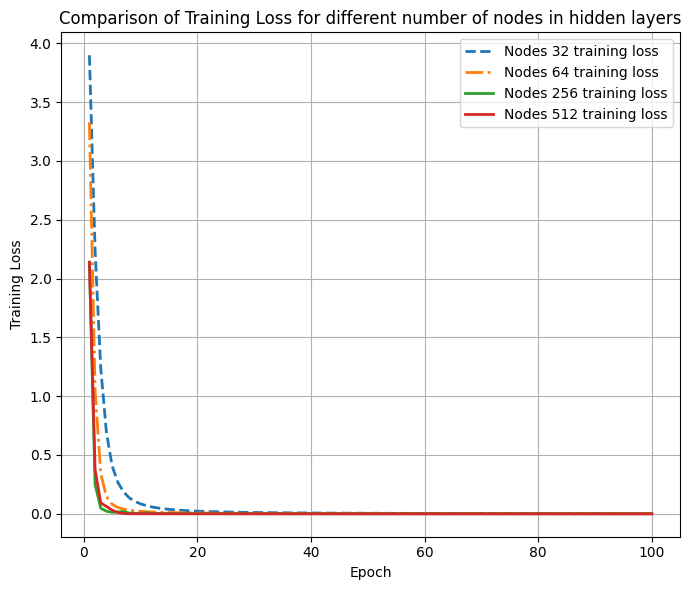

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['loss']) + 1), results[0].history['loss'], label='Nodes 32 training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['loss']) + 1), results[1].history['loss'], label='Nodes 64 training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['loss']) + 1), results[2].history['loss'], label='Nodes 256 training loss', linewidth=2, linestyle='-')
ax.plot(np.arange(1, len(results[3].history['loss']) + 1), results[3].history['loss'], label='Nodes 512 training loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss for different number of nodes in hidden layers')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

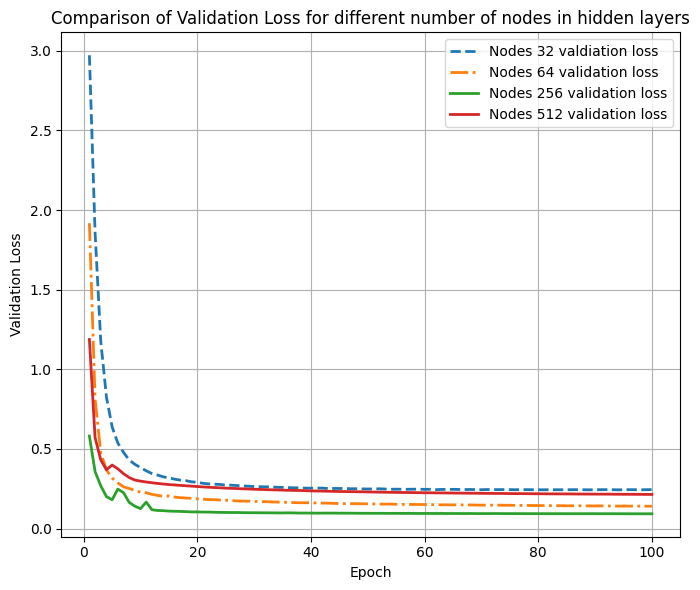

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_loss']) + 1), results[0].history['val_loss'], label='Nodes 32 valdiation loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_loss']) + 1), results[1].history['val_loss'], label='Nodes 64 validation loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_loss']) + 1), results[2].history['val_loss'], label='Nodes 256 validation loss', linewidth=2, linestyle='-')
ax.plot(np.arange(1, len(results[3].history['val_loss']) + 1), results[3].history['val_loss'], label='Nodes 512 validation loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Comparison of Validation Loss for different number of nodes in hidden layers')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

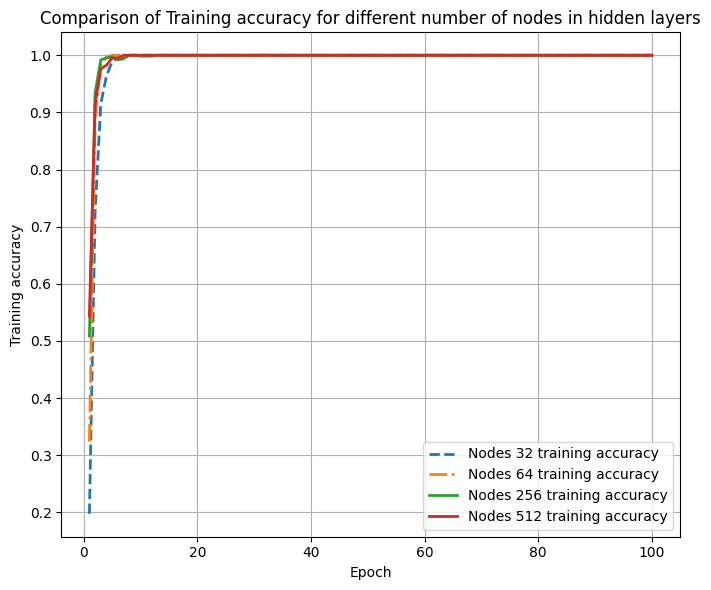

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['accuracy']) + 1), results[0].history['accuracy'], label='Nodes 32 training accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['accuracy']) + 1), results[1].history['accuracy'], label='Nodes 64 training accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['accuracy']) + 1), results[2].history['accuracy'], label='Nodes 256 training accuracy', linewidth=2, linestyle='-')
ax.plot(np.arange(1, len(results[3].history['accuracy']) + 1), results[3].history['accuracy'], label='Nodes 512 training accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training accuracy')
ax.set_title('Comparison of Training accuracy for different number of nodes in hidden layers')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

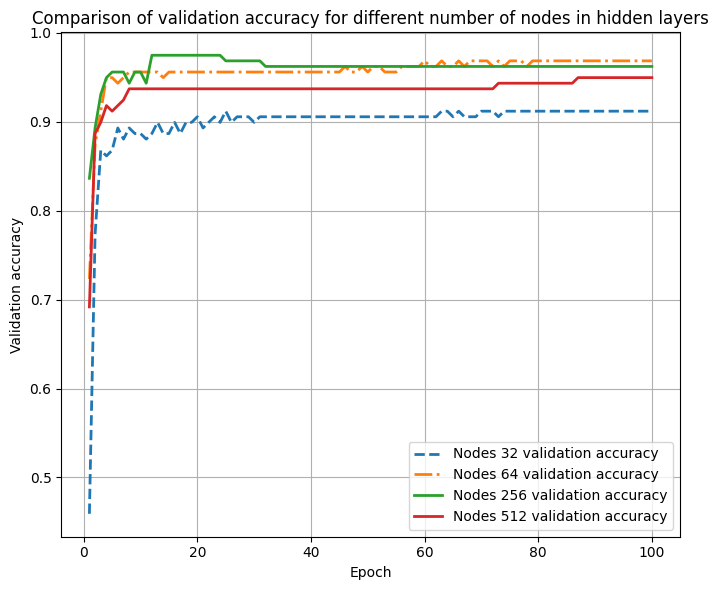

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_accuracy']) + 1), results[0].history['val_accuracy'], label='Nodes 32 validation accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_accuracy']) + 1), results[1].history['val_accuracy'], label='Nodes 64 validation accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_accuracy']) + 1), results[2].history['val_accuracy'], label='Nodes 256 validation accuracy', linewidth=2, linestyle='-')
ax.plot(np.arange(1, len(results[3].history['val_accuracy']) + 1), results[3].history['val_accuracy'], label='Nodes 512 validation accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation accuracy')
ax.set_title('Comparison of validation accuracy for different number of nodes in hidden layers')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

AS we can see from the graphs by increase the number of nodes in the hidden layer this help the model to capture more complex patterns in the data.<br>
for the model with 256 hidden nodes i can see the evaluation on the train  data was 100% accuracy while in the validation data it was 0.95 so in the upcoming experiments i will try to use both the regularization and dropout to make those values close to each other.

# Tuning the Regularization:
i will try the following values for regularizaion[0.1,0.01,0.001]
with the model with those hyperparameters which i get from the previous experiment:
    hyperparameters = {
        'number_of_nodes':256,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
    }

In [ ]:
number_of_nodes_values = [64, 128, 256]
models = []
results = []
metrics = []

for node in number_of_nodes_values:
    hyperparameters = {
        'number_of_nodes': node,
        'reg': 0,
        'batch_size': 32,
        'epochs': 500,
        'optimizer': 'Adam',
        'LR': 0.001,
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters)
    models.append(model)
    results.append(result)
    history = result.history
    metric = {

        'accuracy': history['accuracy'],
        'val_loss': history['val_loss'],
        'val_accuracy': history['val_accuracy']
    }
    metrics.append(metric)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with number of nodes {number_of_nodes_values[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")

Epoch 1/500
20/20 - 1s - loss: 4.5143 - accuracy: 0.0379 - val_loss: 4.2472 - val_accuracy: 0.0943 - 1s/epoch - 54ms/step
Epoch 2/500
20/20 - 0s - loss: 3.9418 - accuracy: 0.1532 - val_loss: 3.8102 - val_accuracy: 0.2516 - 77ms/epoch - 4ms/step
Epoch 3/500
20/20 - 0s - loss: 3.4631 - accuracy: 0.3776 - val_loss: 3.4217 - val_accuracy: 0.3774 - 86ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 3.0515 - accuracy: 0.5182 - val_loss: 3.0852 - val_accuracy: 0.4717 - 80ms/epoch - 4ms/step
Epoch 5/500
20/20 - 0s - loss: 2.6802 - accuracy: 0.6667 - val_loss: 2.7781 - val_accuracy: 0.5849 - 85ms/epoch - 4ms/step
Epoch 6/500
20/20 - 0s - loss: 2.3553 - accuracy: 0.7441 - val_loss: 2.5050 - val_accuracy: 0.6855 - 76ms/epoch - 4ms/step
Epoch 7/500
20/20 - 0s - loss: 2.0671 - accuracy: 0.8136 - val_loss: 2.2591 - val_accuracy: 0.7296 - 100ms/epoch - 5ms/step
Epoch 8/500
20/20 - 0s - loss: 1.8119 - accuracy: 0.8784 - val_loss: 2.0437 - val_accuracy: 0.7799 - 78ms/epoch - 4ms/step
Epoch 9/500
20/2

In [ ]:
regularizations=[0.5,0.1,0.01]
models = []
results = []
metrics = []

for reg in regularizations:
    hyperparameters = {
        'number_of_nodes':265,
        'reg': reg,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters)
    models.append(model)
    results.append(result)
    history = result.history
    metric = {

        'accuracy': history['accuracy'],
        'val_loss': history['val_loss'],
        'val_accuracy': history['val_accuracy']
    }
    metrics.append(metric)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with regularization term {regularizations[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")


Epoch 1/100
20/20 - 2s - loss: 21.3100 - accuracy: 0.2528 - val_loss: 8.1098 - val_accuracy: 0.3082 - 2s/epoch - 115ms/step
Epoch 2/100
20/20 - 0s - loss: 5.1496 - accuracy: 0.4739 - val_loss: 3.7046 - val_accuracy: 0.6226 - 154ms/epoch - 8ms/step
Epoch 3/100
20/20 - 0s - loss: 3.1725 - accuracy: 0.6651 - val_loss: 2.9781 - val_accuracy: 0.6730 - 134ms/epoch - 7ms/step
Epoch 4/100
20/20 - 0s - loss: 2.7231 - accuracy: 0.7093 - val_loss: 2.6507 - val_accuracy: 0.7862 - 121ms/epoch - 6ms/step
Epoch 5/100
20/20 - 0s - loss: 2.4453 - accuracy: 0.7709 - val_loss: 2.4027 - val_accuracy: 0.7862 - 124ms/epoch - 6ms/step
Epoch 6/100
20/20 - 0s - loss: 2.4315 - accuracy: 0.7425 - val_loss: 2.5704 - val_accuracy: 0.7107 - 173ms/epoch - 9ms/step
Epoch 7/100
20/20 - 0s - loss: 2.4190 - accuracy: 0.7346 - val_loss: 2.5459 - val_accuracy: 0.7421 - 97ms/epoch - 5ms/step
Epoch 8/100
20/20 - 0s - loss: 2.4888 - accuracy: 0.7267 - val_loss: 2.5545 - val_accuracy: 0.7233 - 98ms/epoch - 5ms/step
Epoch 9/10

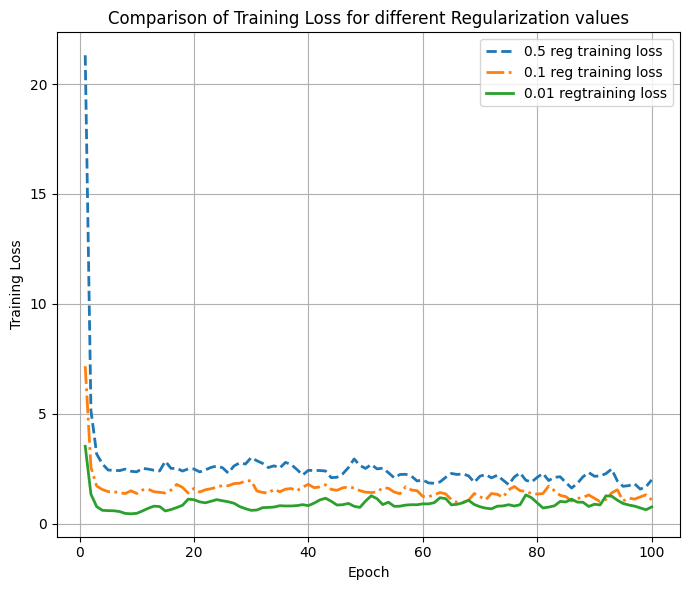

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['loss']) + 1), results[0].history['loss'], label='0.5 reg training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['loss']) + 1), results[1].history['loss'], label='0.1 reg training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['loss']) + 1), results[2].history['loss'], label='0.01 regtraining loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss for different Regularization values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

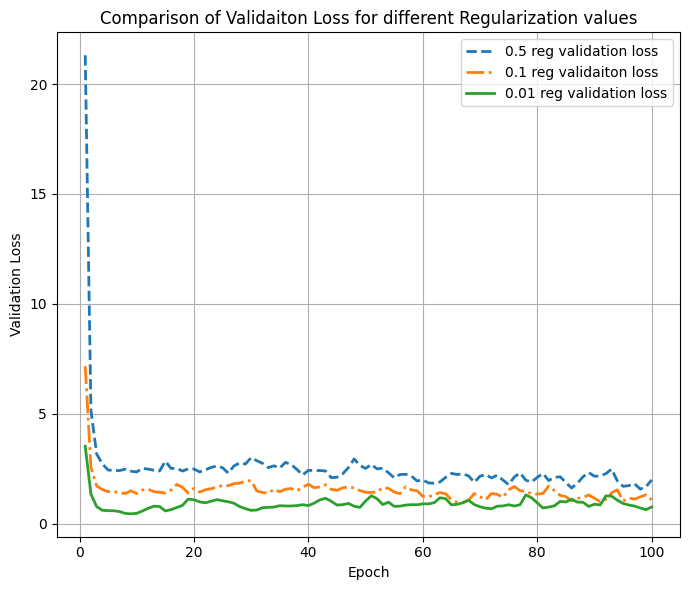

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_loss']) + 1), results[0].history['loss'], label='0.5 reg validation loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_loss']) + 1), results[1].history['loss'], label='0.1 reg validaiton loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_loss']) + 1), results[2].history['loss'], label='0.01 reg validation loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Comparison of Validaiton Loss for different Regularization values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

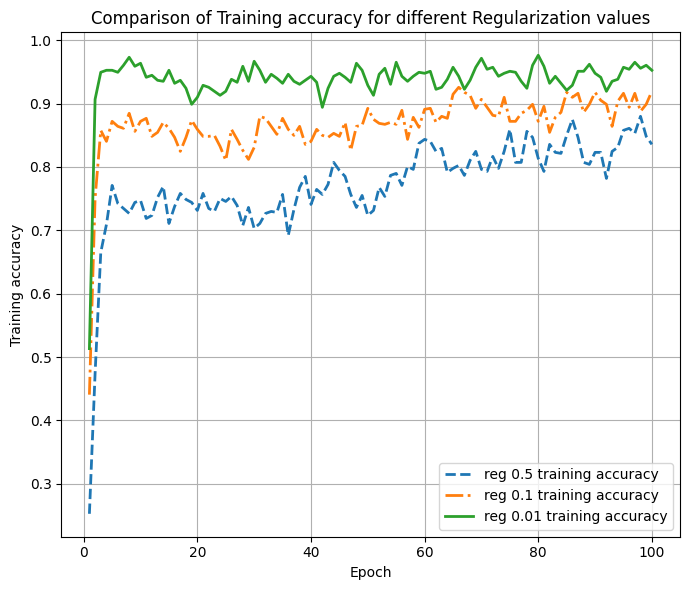

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['accuracy']) + 1), results[0].history['accuracy'], label='reg 0.5 training accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['accuracy']) + 1), results[1].history['accuracy'], label='reg 0.1 training accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['accuracy']) + 1), results[2].history['accuracy'], label='reg 0.01 training accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training accuracy')
ax.set_title('Comparison of Training accuracy for different Regularization values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

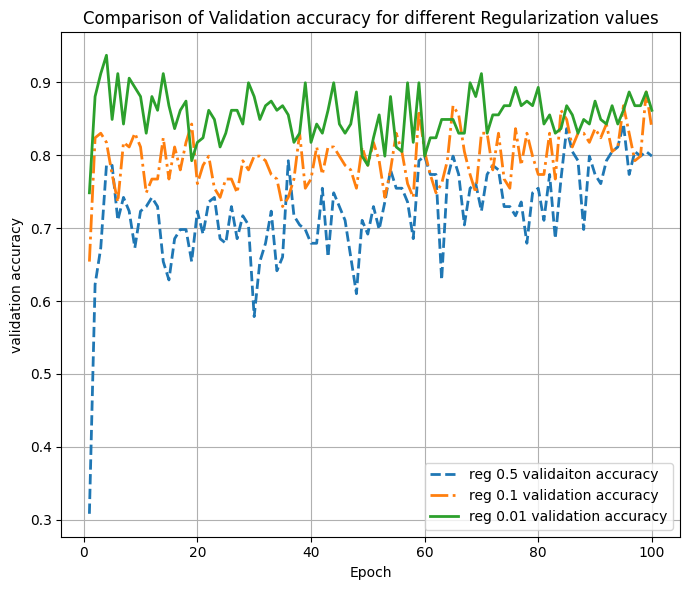

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_accuracy']) + 1), results[0].history['val_accuracy'], label='reg 0.5 validaiton accuracy', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_accuracy']) + 1), results[1].history['val_accuracy'], label='reg 0.1 validation accuracy', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_accuracy']) + 1), results[2].history['val_accuracy'], label='reg 0.01 validation accuracy', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('validation accuracy')
ax.set_title('Comparison of Validation accuracy for different Regularization values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## conclusion:
 as expected increasing the Regularizaiton value, would affect the model accuracy in capturing the patterns in the data, as we can see from the above graphs the regularization term with value =0.5 was really bad in the evaluation on both the train and validation sets.
 so to try to reduce the gap between the train and validation accuracy i will try the dropout technique in the next experiment and i will set the regularization to zero again as it didn't help.

 # Tuning the drop out Ratio:
 i will try the following values for drop out ratio [0.1,0.25,0.5]
with the model with those hyperparameters which i get from the previous experiment:
    hyperparameters = {
        'number_of_nodes':256,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
        'reg':0
    }

In [ ]:
drops=[0.1,0.25,0.5]
models = []
results = []
metrics = []

for drop in drops:
    hyperparameters = {
        'number_of_nodes':264,
        'reg': 0,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
        'dropOut':drop
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters)
    models.append(model)
    results.append(result)
    history = result.history
    metric = {

        'accuracy': history['accuracy'],
        'val_loss': history['val_loss'],
        'val_accuracy': history['val_accuracy']
    }
    metrics.append(metric)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with drop out  term {drops[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")


Epoch 1/100
20/20 - 3s - loss: 2.2557 - accuracy: 0.4976 - val_loss: 0.7984 - val_accuracy: 0.7799 - 3s/epoch - 167ms/step
Epoch 2/100
20/20 - 0s - loss: 0.2660 - accuracy: 0.9210 - val_loss: 0.4155 - val_accuracy: 0.8931 - 86ms/epoch - 4ms/step
Epoch 3/100
20/20 - 0s - loss: 0.1169 - accuracy: 0.9747 - val_loss: 0.2531 - val_accuracy: 0.9119 - 86ms/epoch - 4ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0355 - accuracy: 0.9937 - val_loss: 0.1872 - val_accuracy: 0.9497 - 84ms/epoch - 4ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.1566 - val_accuracy: 0.9560 - 86ms/epoch - 4ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1382 - val_accuracy: 0.9560 - 92ms/epoch - 5ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1249 - val_accuracy: 0.9623 - 98ms/epoch - 5ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1244 - val_accuracy: 0.9623 - 108ms/epoch - 5ms/step
Epoch 9/100
20/

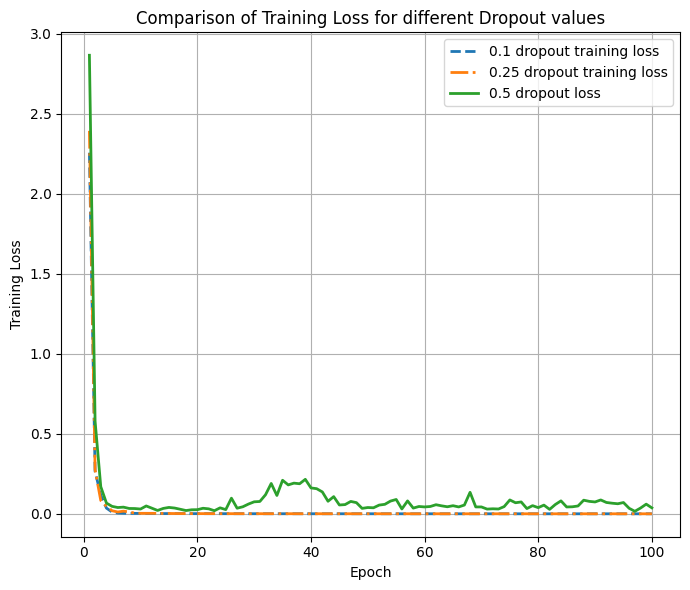

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['loss']) + 1), results[0].history['loss'], label='0.1 dropout training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['loss']) + 1), results[1].history['loss'], label='0.25 dropout training loss', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['loss']) + 1), results[2].history['loss'], label='0.5 dropout loss', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Comparison of Training Loss for different Dropout values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

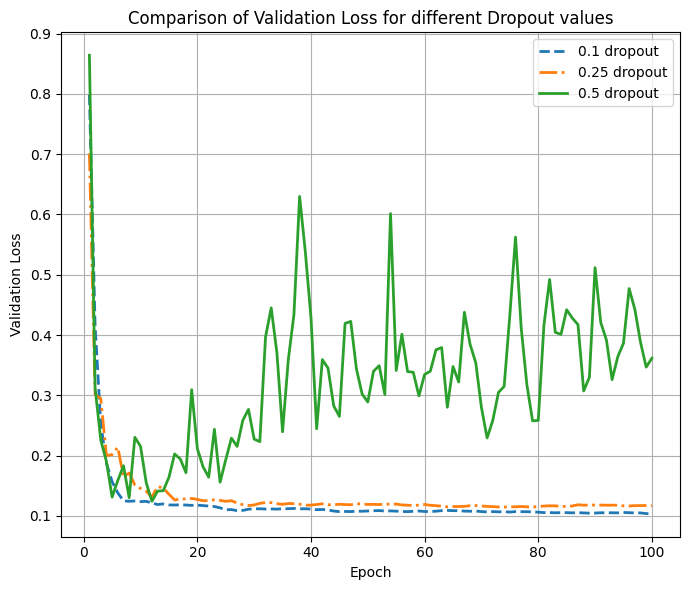

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_loss']) + 1), results[0].history['val_loss'], label='0.1 dropout  ', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_loss']) + 1), results[1].history['val_loss'], label='0.25 dropout', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_loss']) + 1), results[2].history['val_loss'], label='0.5 dropout', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Comparison of Validation Loss for different Dropout values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

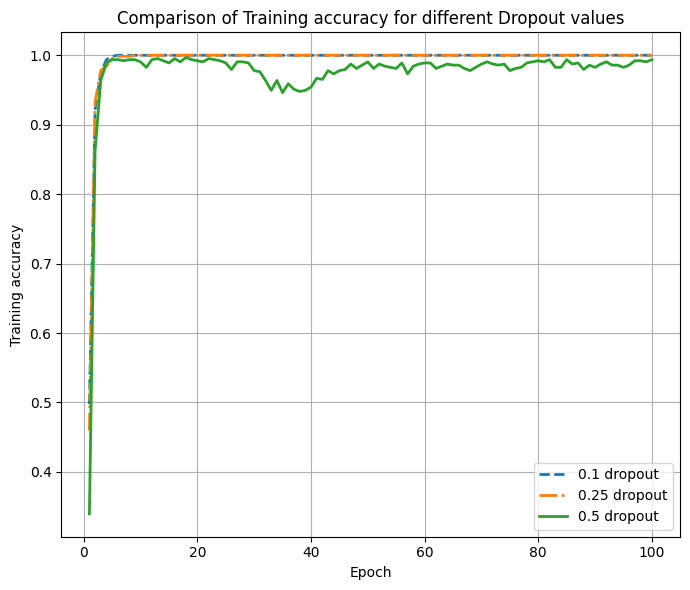

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['accuracy']) + 1), results[0].history['accuracy'], label='0.1 dropout ', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['accuracy']) + 1), results[1].history['accuracy'], label='0.25 dropout', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['accuracy']) + 1), results[2].history['accuracy'], label='0.5 dropout', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training accuracy')
ax.set_title('Comparison of Training accuracy for different Dropout values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

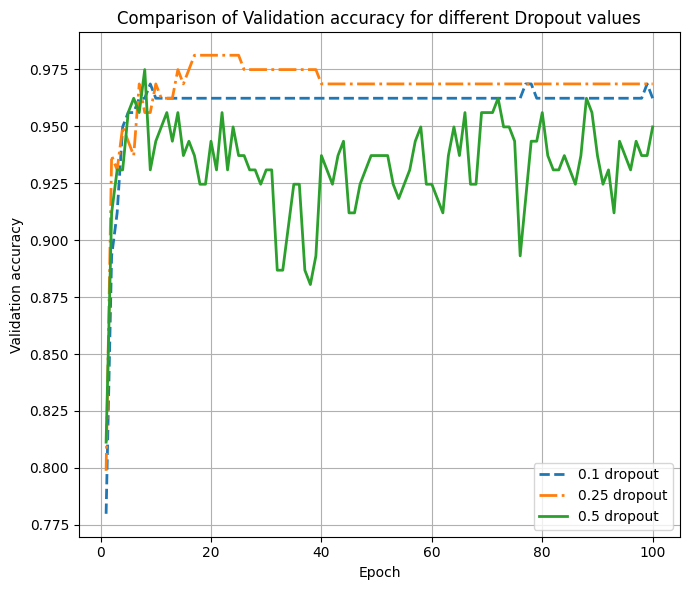

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['val_accuracy']) + 1), results[0].history['val_accuracy'], label='0.1 dropout ', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[1].history['val_accuracy']) + 1), results[1].history['val_accuracy'], label='0.25 dropout', linewidth=2, linestyle='-.')
ax.plot(np.arange(1, len(results[2].history['val_accuracy']) + 1), results[2].history['val_accuracy'], label='0.5 dropout', linewidth=2, linestyle='-')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation accuracy')
ax.set_title('Comparison of Validation accuracy for different Dropout values')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## conclusion:
as we can see from the above graph that the dropout could really help to reduce the gap between the accuracy on the training and validation sets, but also as we increase the value of the dropout ratio to 0.5 this lead to worse stability and accuracy. so after those experiment i have found that the model with the following hyperparameter            
  {'number_of_nodes':264,
        'reg': 0,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
        'dropOut':0.1 } <br>
is the best model to evaluate on the test data,

# Final evaluation:
after getting the best hyperparameter in the next cells i will try to evaluate the model with the above hyperparameters.

In [ ]:
# Best model
drops=[0.1]
models = []
results = []
metrics = []

for drop in drops:
    hyperparameters = {
        'number_of_nodes':264,
        'reg': 0,
        'batch_size': 32,
        'epochs': 100,
        'optimizer':'adam',
        'LR': 0.01,
        'dropOut':drop
    }
    model, result = train_model(scaled_x_train, y_train, scaled_x_val, y_val, hyperparameters)
    models.append(model)
    results.append(result)
    history = result.history
    metric = {

        'accuracy': history['accuracy'],
        'val_loss': history['val_loss'],
        'val_accuracy': history['val_accuracy']
    }
    metrics.append(metric)

# Evaluate the models
for i, model in enumerate(models):
    print(f"Evaluation for model with drop out  term {drops[i]}:")
    train_accuracy, test_accuracy = evaluation(scaled_x_train, scaled_x_test, y_train, y_test, model)
    print(f"Training accuracy: {train_accuracy}, Testing accuracy: {test_accuracy}")


Epoch 1/100
20/20 - 2s - loss: 2.2191 - accuracy: 0.4882 - val_loss: 0.7174 - val_accuracy: 0.8176 - 2s/epoch - 98ms/step
Epoch 2/100
20/20 - 0s - loss: 0.2395 - accuracy: 0.9352 - val_loss: 0.3545 - val_accuracy: 0.9119 - 175ms/epoch - 9ms/step
Epoch 3/100
20/20 - 0s - loss: 0.1008 - accuracy: 0.9810 - val_loss: 0.2181 - val_accuracy: 0.9308 - 192ms/epoch - 10ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0392 - accuracy: 0.9905 - val_loss: 0.2155 - val_accuracy: 0.9245 - 231ms/epoch - 12ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.1648 - val_accuracy: 0.9308 - 250ms/epoch - 13ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.1867 - val_accuracy: 0.9308 - 174ms/epoch - 9ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.1829 - val_accuracy: 0.9434 - 157ms/epoch - 8ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1530 - val_accuracy: 0.9434 - 180ms/epoch - 9ms/step
Epoch 9

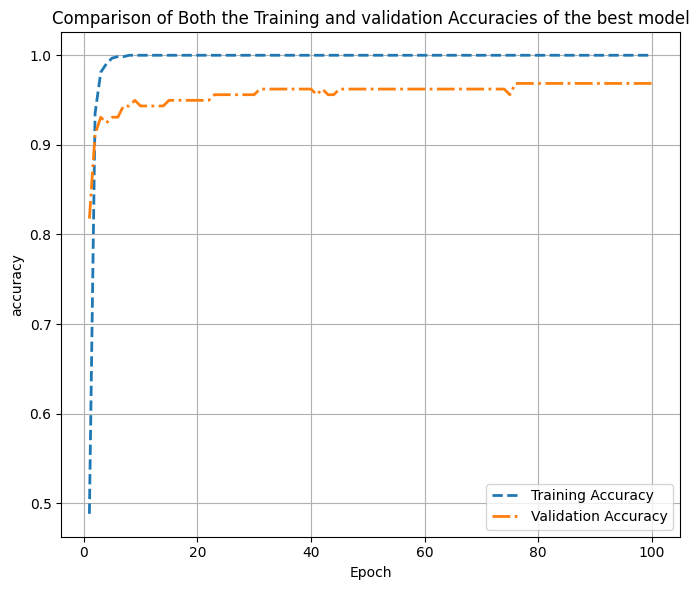

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['accuracy']) + 1), results[0].history['accuracy'], label='Training Accuracy ', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[0].history['val_accuracy']) + 1), results[0].history['val_accuracy'], label='Validation Accuracy', linewidth=2, linestyle='-.')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
ax.set_title('Comparison of Both the Training and validation Accuracies of the best model')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

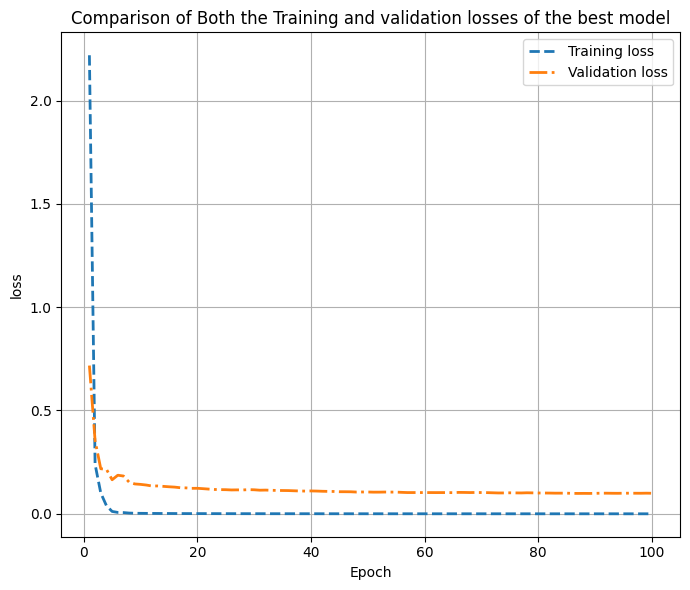

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(np.arange(1, len(results[0].history['loss']) + 1), results[0].history['loss'], label='Training loss', linewidth=2, linestyle='--')
ax.plot(np.arange(1, len(results[0].history['val_loss']) + 1), results[0].history['val_loss'], label='Validation loss', linewidth=2, linestyle='-.')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_title('Comparison of Both the Training and validation losses of the best model')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### final conclusion:
the model with the above hyperparameters could really capture the patterns in this problem and this can be seen from the Generalization Test done on the test data. as from the graphs we can say that this is considered a good fit model as the Accuracy on the training set is 1.0 and the accuracy on the validation set is 0.98.